<a href="https://colab.research.google.com/github/sanhiitaa/fastag-fraud-detection-classification/blob/main/fastag_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
x_train = pd.read_csv('/content/drive/MyDrive/datasets/fastag dataset/fast_tag_x_train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/datasets/fastag dataset/fast_tag_x_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/datasets/fastag dataset/fast_tag_y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/datasets/fastag dataset/fast_tag_y_test.csv')

# Models

In [44]:
# helper function
def scorer(model_name, df_name, y_test, y_pred):

  # importing the metric library
  from sklearn.metrics import classification_report

  # classififcation report
  score= classification_report(y_test, y_pred, output_dict=True)
  df_name[model_name]={'accuracy-score': score['accuracy'],
                                'precision-score': score['weighted avg']['precision'],
                                'recall-score': score['weighted avg']['recall'],
                                'f1-score': score['weighted avg']['f1-score']}

  return df_name[model_name]

In [45]:
# defining a score dataframe for model scores for comparison later
scores = pd.DataFrame()
pd.set_option('display.float_format', lambda x: '%.12f' % x)

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

le = LogisticRegression()
le.fit(x_train, y_train)
y_pred = le.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
scorer('Logistic Regression', scores, y_test, y_pred)

accuracy-score    0.780666666667
precision-score   0.611296395194
recall-score      0.780666666667
f1-score          0.685677274429
Name: Logistic Regression, dtype: float64

### random forest classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

<ipython-input-48-f4a88e5bfd7c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


In [49]:
scorer('Random Forest Classifier', scores, y_test, y_pred)

accuracy-score    0.764666666667
precision-score   0.690363732394
recall-score      0.764666666667
f1-score          0.704465676348
Name: Random Forest Classifier, dtype: float64

### KNN classifier

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [51]:
scorer('KNN Classifier', scores, y_test, y_pred)

accuracy-score    0.760666666667
precision-score   0.693467727005
recall-score      0.760666666667
f1-score          0.708377007668
Name: KNN Classifier, dtype: float64

### Gradient Boosting Classifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred= gb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
scorer('Gradient Boosting Classifier', scores, y_test, y_pred)

accuracy-score    0.776000000000
precision-score   0.630607973625
recall-score      0.776000000000
f1-score          0.684585207545
Name: Gradient Boosting Classifier, dtype: float64

### XGBoost

In [54]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train, y_train)
y_pred= xgb.predict(x_test)

In [55]:
scorer('XGBoost', scores, y_test, y_pred)

accuracy-score    0.752666666667
precision-score   0.685231762009
recall-score      0.752666666667
f1-score          0.703969281863
Name: XGBoost, dtype: float64

### CatBoost

In [56]:
!pip install catboost -q

In [57]:
from catboost import CatBoostClassifier
cat= CatBoostClassifier(verbose=0)
cat.fit(x_train, y_train)
y_pred= cat.predict(x_test)

In [58]:
scorer('CatBoost', scores, y_test, y_pred)

accuracy-score    0.772000000000
precision-score   0.664505122014
recall-score      0.772000000000
f1-score          0.689421747777
Name: CatBoost, dtype: float64

### SVM Classification

In [59]:
from sklearn.svm import SVC
svc= SVC(class_weight='balanced')
svc.fit(x_train, y_train)
y_pred= svc.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
scorer('SVM Classification', scores, y_test, y_pred)

accuracy-score    0.573333333333
precision-score   0.728533922218
recall-score      0.573333333333
f1-score          0.610315676833
Name: SVM Classification, dtype: float64

In [61]:
scores

,Logistic Regression,Random Forest Classifier,KNN Classifier,Gradient Boosting Classifier,XGBoost,CatBoost,SVM Classification
accuracy-score,0.780666666667,0.764666666667,0.760666666667,0.776000000000,0.752666666667,0.772000000000,0.573333333333
precision-score,0.611296395194,0.690363732394,0.693467727005,0.630607973625,0.685231762009,0.664505122014,0.728533922218
recall-score,0.780666666667,0.764666666667,0.760666666667,0.776000000000,0.752666666667,0.772000000000,0.573333333333
f1-score,0.685677274429,0.704465676348,0.708377007668,0.684585207545,0.703969281863,0.689421747777,0.610315676833


# Visualizing model performances:

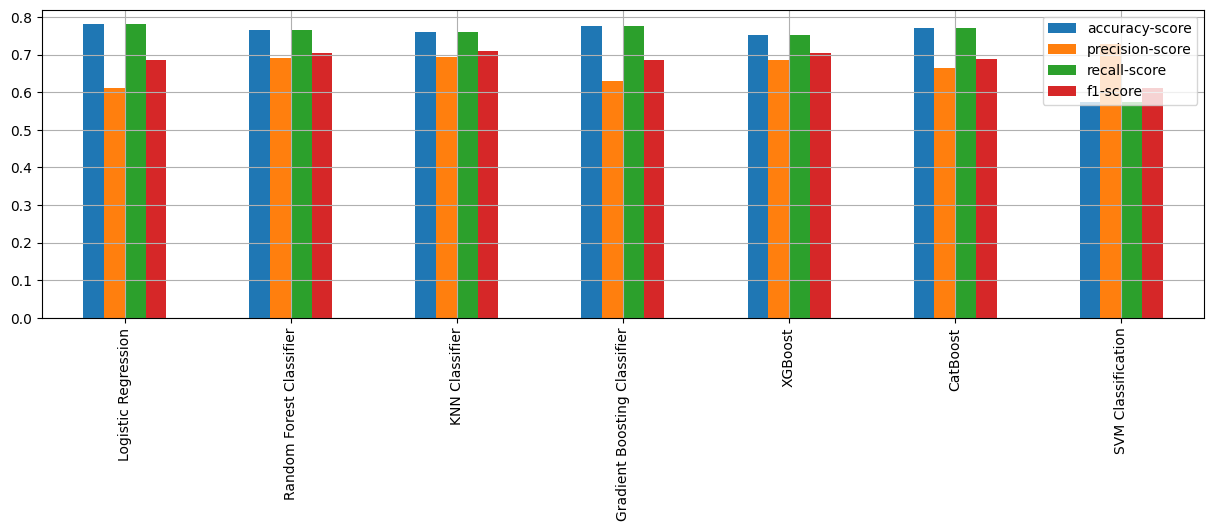

In [62]:
scores.T.plot(kind='bar', figsize=(15,4) )
plt.grid()
plt.show()


Considering that the dataset is unbalanced, it is wise to choose a model that balances both precision and recall. The F1-score provides a good measure of this balance, as it is the harmonic mean of precision and recall. Therefore, the `KNN Classifier` stands out as the ***best performing model*** because it has the highest F1-score, indicating its superior ability to manage the trade-off between precision and recall effectively.